<a href="https://colab.research.google.com/github/felixyuzhenyang/MSSP-6070-YuzhenYang/blob/main/Assignment1_YuzhenYang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 YuzhenYang
This is a basic analysis based on the academic performance data set collected by Colombian Institute for the Evaluation of Education.

In [159]:
from google.colab import userdata
import os
os.chdir('/content')
github_token = userdata.get('GitHub_MSSP6070')
owner = 'felixyuzhenyang'
repository = 'MSSP-6070-YuzhenYang'

clone_url = f'https://{github_token}@github.com/{owner}/{repository}.git'

!git clone {clone_url}

Cloning into 'MSSP-6070-YuzhenYang'...
remote: Enumerating objects: 189, done.
remote: Total 189 (delta 0), reused 0 (delta 0), pack-reused 189 (from 1)
Receiving objects: 100% (189/189), 6.86 MiB | 12.32 MiB/s, done.
Resolving deltas: 100% (104/104), done.


# Part One
This part is to go through the data set and to clean the data.

In [160]:
##### ----- 1. Part One -----
import pandas as pd
import os
import numpy as np

working_directory = '/content/MSSP-6070-YuzhenYang/data/data_assignment1'

try:
    os.chdir(working_directory)
    print(f"New working path successfully set: {os.getcwd()}")
except FileNotFoundError:
    print(f"error: path not exist: {working_directory}")

df = pd.read_csv("data_academic_performance.csv")
print("\nfile loaded")
df.info()


New working path successfully set: /content/MSSP-6070-YuzhenYang/data/data_assignment1

file loaded
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   COD_S11           12411 non-null  object 
 1   GENDER            12411 non-null  object 
 2   EDU_FATHER        12411 non-null  object 
 3   EDU_MOTHER        12411 non-null  object 
 4   OCC_FATHER        12411 non-null  object 
 5   OCC_MOTHER        12411 non-null  object 
 6   STRATUM           12411 non-null  object 
 7   SISBEN            12411 non-null  object 
 8   PEOPLE_HOUSE      12411 non-null  object 
 9   Unnamed: 9        0 non-null      float64
 10  INTERNET          12411 non-null  object 
 11  TV                12411 non-null  object 
 12  COMPUTER          12411 non-null  object 
 13  WASHING_MCH       12411 non-null  object 
 14  MIC_OVEN          12411 non-null  

This section aims to clean and process key variables.

In [161]:

#### ---- 1.1 data cleaning and process key variables  ----
### --- 1.1.1 delate irrelevant and null variable ---
if 'Unnamed: 9' in df.columns:
    df = df.drop(columns=['Unnamed: 9'])
    print("Column 'Unnamed: 9' (completely null) has been dropped.")
else:
    print("Column 'Unnamed: 9' not found (already dropped or not present).")

print(f"Initial data loaded: {len(df)} rows and {len(df.columns)} columns.")

### --- 1.1.2 transfer to category variable ---

print("GENDER Unique Values:", df['GENDER'].unique())
print("\nSTRATUM Unique Values:", df['STRATUM'].unique())
print("\nEDU_FATHER Unique Values:", df['EDU_FATHER'].unique())
print("\nEDU_MOTHER Unique Values:", df['EDU_MOTHER'].unique())

Column 'Unnamed: 9' (completely null) has been dropped.
Initial data loaded: 12411 rows and 44 columns.
GENDER Unique Values: ['F' 'M']

STRATUM Unique Values: ['Stratum 4' 'Stratum 5' 'Stratum 2' 'Stratum 6' 'Stratum 3' 'Stratum 1'
 '0']

EDU_FATHER Unique Values: ['Incomplete Professional Education' 'Complete Secundary' 'Not sure'
 'Complete professional education' 'Incomplete Secundary'
 'Incomplete technical or technological'
 'Complete technique or technology' 'Incomplete primary '
 'Complete primary ' 'Postgraduate education' '0' 'Ninguno']

EDU_MOTHER Unique Values: ['Complete technique or technology' 'Complete professional education'
 'Not sure' 'Complete Secundary' 'Incomplete technical or technological'
 'Incomplete primary ' 'Incomplete Secundary'
 'Incomplete Professional Education' 'Postgraduate education'
 'Complete primary ' '0' 'Ninguno']


In [162]:
## -- STRATUM --
stratum_mapping = {f'Stratum {i}': i for i in range(1, 7)}
df['STRATUM_ORDINAL'] = df['STRATUM'].map(stratum_mapping).astype('Int64')
print("\nSTRATUM Unique Values:", df['STRATUM'].unique())
print(df['STRATUM_ORDINAL'].head())
print(df['STRATUM_ORDINAL'].dtypes)


STRATUM Unique Values: ['Stratum 4' 'Stratum 5' 'Stratum 2' 'Stratum 6' 'Stratum 3' 'Stratum 1'
 '0']
0    4
1    5
2    2
3    2
4    4
Name: STRATUM_ORDINAL, dtype: Int64
Int64


In [163]:
## -- Education (EDU_FATHER / EDU_MOTHER) --
edu_map_corrected = {
    # level 0: none
    'None': 0,
    'Not sure': 0,
    'Ninguno': 0,
    '0': 0,
    # level 1: Primary
    'Incomplete Primary': 1,
    'Incomplete primary ': 1,
    'Complete Primary': 1,
    'Complete primary ': 1,
    # level 2: Secondary
    'Incomplete Secundary': 2,
    'Complete Secundary': 2,
    # level 3: Technical/Incomplete Professional
    'Incomplete technique or technology': 3,
    'Incomplete technical or technological': 3,
    'Complete technique or technology': 3,
    'Incomplete professional education': 3,
    'Incomplete Professional Education': 3,
    # level 4: Complete Professional/Postgraduate)
    'Complete professional education': 4,
    'Postgraduate': 4,
    'Postgraduate education': 4,
}

df['EDU_FATHER_ORDINAL'] = df['EDU_FATHER'].map(edu_map_corrected)
df['EDU_MOTHER_ORDINAL'] = df['EDU_MOTHER'].map(edu_map_corrected)

# Proxy for SES (Max of parents education)
df['MAX_EDU_ORDINAL'] = df[['EDU_FATHER_ORDINAL', 'EDU_MOTHER_ORDINAL']].max(axis=1)

# check if still have null
if df['MAX_EDU_ORDINAL'].isnull().any():
    print("\n--- warning: still have null ---")
    print(df['EDU_FATHER'].loc[df['EDU_FATHER_ORDINAL'].isnull()].unique())
    print(df['EDU_MOTHER'].loc[df['EDU_MOTHER_ORDINAL'].isnull()].unique())
else:
    print("\nNaN")



NaN


In [164]:
## -- COMPUTER --
print("\n--- cleaning COMPUTER variable ---")

df['COMPUTER'] = df['COMPUTER'].astype(str).str.strip().str.title()

valid_values = ['Yes', 'No']
df['COMPUTER'] = df['COMPUTER'].where(df['COMPUTER'].isin(valid_values))

print(df['COMPUTER'].value_counts(dropna=False).to_markdown())


--- cleaning COMPUTER variable ---
| COMPUTER   |   count |
|:-----------|--------:|
| Yes        |   10174 |
| No         |    2237 |


In [165]:
## -- High School Composite Score (S11_COMPOSITE) --
print("\n--- constructing S11_COMPOSITE (mean of S11 subject scores) ---")

s11_subjects = ['MAT_S11', 'CR_11', 'CC_S11', 'BIO_S11', 'ENG_S11']

missing_cols = [c for c in s11_subjects if c not in df.columns]
if missing_cols:
    print(f"Warning: The following columns are missing and will be ignored: {missing_cols}")

available_cols = [c for c in s11_subjects if c in df.columns]
df['S11_COMPOSITE'] = df[available_cols].mean(axis=1, skipna=True)

desc_s11 = df['S11_COMPOSITE'].describe().to_frame(name='S11_COMPOSITE')
print(desc_s11.to_markdown())

corr = df[['S11_COMPOSITE', 'G_SC']].corr().iloc[0,1]
print(f"\nCorrelation between S11_COMPOSITE and G_SC: {corr:.3f}")



--- constructing S11_COMPOSITE (mean of S11 subject scores) ---
|       |   S11_COMPOSITE |
|:------|----------------:|
| count |      12411      |
| mean  |         62.6944 |
| std   |         10.0497 |
| min   |         35.75   |
| 25%   |         55.25   |
| 50%   |         62      |
| 75%   |         69.5    |
| max   |         98      |

Correlation between S11_COMPOSITE and G_SC: 0.771


In [166]:
## REVENUE （This cell is not used in further analysis and not presented in the report.)
revenue_dummies = pd.get_dummies(df['REVENUE'], prefix='REVENUE')
df_final = pd.concat([df, revenue_dummies], axis=1)

revenue_map = {
    'Less than 1 LMMW': 0.5,
    'Between 1 and less than 2 LMMW': 1.5,
    'Between 2 and less than 3 LMMW': 2.5,
    'Between 3 and less than 5 LMMW': 4.0,
    'Between 5 and less than 7 LMMW': 6.0,
    'Between 7 and less than 10 LMMW': 8.5,
    '10 or more LMMW': 12.0,
}
df_final['REVENUE_ORDINAL'] = df_final['REVENUE'].map(revenue_map)

In [167]:
### --- 1.1.3 check & save cleaned data ---
print("\n--- head and key variables check ---")

print(df_final[['STRATUM', 'STRATUM_ORDINAL',
          'EDU_FATHER', 'MAX_EDU_ORDINAL',
          'REVENUE', 'REVENUE_ORDINAL',
          'G_SC']].head(5).to_markdown(index=False))

df_final.to_csv("data_academic_performance_cleaned.csv", index=False)


--- head and key variables check ---
| STRATUM   |   STRATUM_ORDINAL | EDU_FATHER                        |   MAX_EDU_ORDINAL | REVENUE                         |   REVENUE_ORDINAL |   G_SC |
|:----------|------------------:|:----------------------------------|------------------:|:--------------------------------|------------------:|-------:|
| Stratum 4 |                 4 | Incomplete Professional Education |                 3 | Between 1 and less than 2 LMMW  |               1.5 |    180 |
| Stratum 5 |                 5 | Complete Secundary                |                 4 | 10 or more LMMW                 |              12   |    182 |
| Stratum 2 |                 2 | Not sure                          |                 0 | Between 1 and less than 2 LMMW  |               1.5 |    113 |
| Stratum 2 |                 2 | Not sure                          |                 0 | Between 2 and less than 3 LMMW  |               2.5 |    157 |
| Stratum 4 |                 4 | Complete p

# Part 2
Descriptive statistics & comparative analysis across groups

In [168]:
##### ----- Part Two -----
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data_academic_performance_cleaned.csv')

Descriptive statistics

In [169]:
#### --- 2.1 Descriptive statistics ---
# G_SC
score_cols = [
    'MAT_S11', 'CR_S11', 'CC_S11', 'BIO_S11', 'ENG_S11', # Saber 11
    'QR_PRO', 'CR_PRO', 'CC_PRO', 'ENG_PRO', 'WC_PRO', 'FEP_PRO', # Saber Pro Components
    'G_SC' # Global Score
]

print("Summary of Numerical Attributes")
desc_stats = df[score_cols].describe().T[['count', 'mean', 'std', 'min', 'max']]
print(desc_stats.to_markdown(numalign='left', stralign='left'))

Summary of Numerical Attributes
|         | count   | mean    | std     | min   | max   |
|:--------|:--------|:--------|:--------|:------|:------|
| MAT_S11 | 12411   | 64.3208 | 11.8737 | 26    | 100   |
| CR_S11  | 12411   | 60.7784 | 10.0259 | 24    | 100   |
| CC_S11  | 12411   | 60.7052 | 10.1205 | 0     | 100   |
| BIO_S11 | 12411   | 63.9505 | 11.1569 | 11    | 100   |
| ENG_S11 | 12411   | 61.8011 | 14.2978 | 26    | 100   |
| QR_PRO  | 12411   | 77.4173 | 22.6734 | 1     | 100   |
| CR_PRO  | 12411   | 62.1993 | 27.6666 | 1     | 100   |
| CC_PRO  | 12411   | 59.1868 | 28.9918 | 1     | 100   |
| ENG_PRO | 12411   | 67.4983 | 25.4951 | 1     | 100   |
| WC_PRO  | 12411   | 53.7034 | 30.0017 | 0     | 100   |
| FEP_PRO | 12411   | 145.477 | 40.1264 | 1     | 300   |
| G_SC    | 12411   | 162.71  | 23.1125 | 37    | 247   |


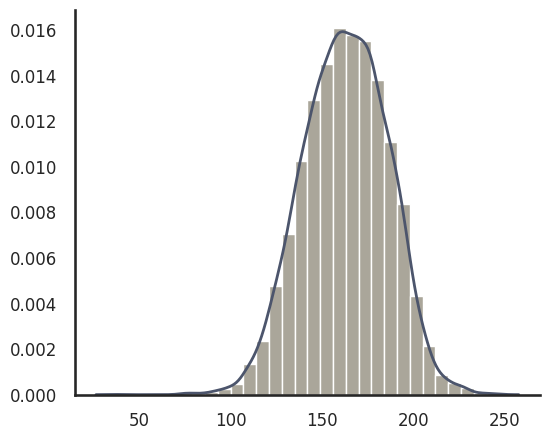

In [170]:
# Visualization: G_SC Distribution
# set template
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})


plt.figure(figsize=(6, 5))
sns.set_style("white")
sns.histplot(
    df['G_SC'].dropna(),
    stat='density',
    bins=30,
    color= sns.color_palette("cividis", 6)[3],
    edgecolor='white'
)
sns.kdeplot(
    df['G_SC'].dropna(),
    color=sns.color_palette("cividis", 6)[1],
    linewidth=2.0
)
# plt.title('G_SC Distribution (Saber Pro Global Score)')
# plt.xlabel('Global Score (G_SC)')
# plt.ylabel('Density')
plt.xlabel(""),
plt.ylabel("")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('GSC_Distribution.png', dpi=300, bbox_inches='tight')
plt.show()


In [171]:
#### ---- 2.2 How Stratum affects G_SC ----
### --- 2.2.1 descriptive statistics ---
print("\n--- descriptive statistics of G_SC by Gender by Stratum ---")
stratum_stats = df.groupby('STRATUM_ORDINAL')['G_SC'].agg(['count', 'mean', 'std']).sort_values(by='STRATUM_ORDINAL', ascending=True)
print(stratum_stats.to_markdown(numalign='left', stralign='left'))

### --- 2.3.2 group comparison (ANOVA) ---
gsc_by_stratum = [df['G_SC'][df['STRATUM_ORDINAL'] == i] for i in range(1, 7)]

f_stat_anova, p_value_anova = stats.f_oneway(*gsc_by_stratum)

print(f"\n---  G_SC Stratum difference (ANOVA) ---")
print(f"F-statistic (ANOVA): {f_stat_anova:.4f}")
print(f"P-value (ANOVA): {p_value_anova:.4f}")


--- descriptive statistics of G_SC by Gender by Stratum ---
| STRATUM_ORDINAL   | count   | mean    | std     |
|:------------------|:--------|:--------|:--------|
| 1                 | 1709    | 152.353 | 21.9374 |
| 2                 | 4029    | 158.199 | 22.278  |
| 3                 | 4045    | 163.815 | 21.694  |
| 4                 | 1578    | 172.003 | 21.4691 |
| 5                 | 633     | 177.387 | 21.5432 |
| 6                 | 403     | 181.511 | 21.8794 |

---  G_SC Stratum difference (ANOVA) ---
F-statistic (ANOVA): 286.0637
P-value (ANOVA): 0.0000


In [172]:
#### ---- 2.3 How gender affect G_SC ----
### --- 2.3.1 descriptive statistics ---
print("\n--- descriptive statistics of G_SC by Gender ---")
gender_stats = df.groupby('GENDER')['G_SC'].agg(['count', 'mean', 'std']).sort_values(by='mean', ascending=False)
print(gender_stats.to_markdown(numalign='left', stralign='left'))

gsc_female = df[df['GENDER'] == 'F']['G_SC']
gsc_male = df[df['GENDER'] == 'M']['G_SC']

### --- 2.3.2 group comparison---
## -- Levene's test --
levene_test = stats.levene(gsc_female, gsc_male)
# p-value is low (e.g.,< 0.05)，use Welch's t-test

if levene_test.pvalue < 0.05:
    equal_var_flag = False
    var_assumption = "Unequal Variances (Welch's t-test used)"
else:
    equal_var_flag = True
    var_assumption = "Equal Variances (Standard t-test used)"

## -- t-test --
t_stat, p_value_ttest = stats.ttest_ind(gsc_female, gsc_male, equal_var=equal_var_flag)

print(f"\n--- G_SC gender difference (t-test) ---")
print(f"levene test result (Levene's p-value): {levene_test.pvalue:.4f}")
print(f"t-test: {var_assumption}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value_ttest:.4f}")
mean_diff_gender = gsc_female.mean() - gsc_male.mean()
print(f"Mean difference (Female - Male): {mean_diff_gender:.2f} points")


--- descriptive statistics of G_SC by Gender ---
| GENDER   | count   | mean    | std     |
|:---------|:--------|:--------|:--------|
| M        | 7368    | 163.691 | 23.5826 |
| F        | 5043    | 161.278 | 22.3329 |

--- G_SC gender difference (t-test) ---
levene test result (Levene's p-value): 0.0003
t-test: Unequal Variances (Welch's t-test used)
t-statistic: -5.7775
p-value: 0.0000
Mean difference (Female - Male): -2.41 points


In [173]:
#### ---- 2.4 How parent education affects G_SC ----
### 2.4.1 --- ANOVA function ---
def run_anova_for_education_variable(df, edu_col_name):

    print(f"--- test: how {edu_col_name}  affects G_SC ---")

    ## descriptive statistics by education level
    print(f"\n--- descriptive statistics: G_SC by the group of {edu_col_name} ---")
    edu_stats = df.groupby(edu_col_name)['G_SC'].agg(['count', 'mean', 'std']).sort_values(by=edu_col_name, ascending=True)
    print(edu_stats.to_markdown(numalign='left', stralign='left'))

    ## ANOVA
    gsc_by_edu = [df['G_SC'][df[edu_col_name] == i] for i in range(5)]
    f_stat_anova, p_value_anova = stats.f_oneway(*gsc_by_edu)

    print(f"\n--- ANOVA result ---")
    print(f"F-statistic: {f_stat_anova:.4f}")
    print(f"P-value: {p_value_anova:.4f}")

    # ANOVA form
    formula = f'G_SC ~ C({edu_col_name})'
    lm = ols(formula, data=df).fit()
    anova_results = anova_lm(lm)

    print("\n--- ANOVA form (report appendix) ---")
    print(anova_results.to_markdown(numalign='left', stralign='left'))

    # save the result
    edu_stats.to_csv(f'{edu_col_name}_gsc_summary.csv')
    print(f"Summary statistics saved to '{edu_col_name}_gsc_summary.csv'.")
    return anova_results.to_markdown()

### --- 2.4.2 Execute ANOVA ---

# EDU_FATHER_ORDINAL
anova_father = run_anova_for_education_variable(df, 'EDU_FATHER_ORDINAL')
# EDU_MOTHER_ORDINAL
anova_mother = run_anova_for_education_variable(df, 'EDU_MOTHER_ORDINAL')
# MAX_EDU_ORDINAL
anova_max_edu = run_anova_for_education_variable(df, 'MAX_EDU_ORDINAL')

--- test: how EDU_FATHER_ORDINAL  affects G_SC ---

--- descriptive statistics: G_SC by the group of EDU_FATHER_ORDINAL ---
| EDU_FATHER_ORDINAL   | count   | mean    | std     |
|:---------------------|:--------|:--------|:--------|
| 0                    | 921     | 157.591 | 21.9114 |
| 1                    | 1559    | 155.447 | 21.7256 |
| 2                    | 3934    | 158.162 | 22.0306 |
| 3                    | 1896    | 164.398 | 22.2813 |
| 4                    | 4101    | 170.205 | 23.0534 |

--- ANOVA result ---
F-statistic: 211.6756
P-value: 0.0000

--- ANOVA form (report appendix) ---
|                       | df    | sum_sq      | mean_sq   | F       | PR(>F)       |
|:----------------------|:------|:------------|:----------|:--------|:-------------|
| C(EDU_FATHER_ORDINAL) | 4     | 423537      | 105884    | 211.676 | 5.52756e-176 |
| Residual              | 12406 | 6.20572e+06 | 500.219   | nan     | nan          |
Summary statistics saved to 'EDU_FATHER_ORDINAL_gsc_s

In [174]:
#### ---- 2.5 How COMPUTER affects G_SC ----
### --- 2.5.1 Descriptive statistics ---
print("\n--- descriptive statistics: G_SC by the group of COMPUTER ---")
comp_stats = (
    df.groupby('COMPUTER')['G_SC']
      .agg(['count', 'mean', 'std'])
      .sort_index()
)
print(comp_stats.to_markdown(numalign='left', stralign='left'))

gsc_yes = df.loc[df['COMPUTER'] == 'Yes', 'G_SC'].dropna()
gsc_no  = df.loc[df['COMPUTER'] == 'No',  'G_SC'].dropna()

### --- 2.5.2 group comparison ---
from scipy import stats

## -- Levene's test --
levene_test = stats.levene(gsc_yes, gsc_no)
if levene_test.pvalue < 0.05:
    equal_var_flag = False
    var_assumption = "Unequal Variances (Welch's t-test used)"
else:
    equal_var_flag = True
    var_assumption = "Equal Variances (Standard t-test used)"

## -- t-test --
t_stat, p_value_ttest = stats.ttest_ind(gsc_yes, gsc_no, equal_var=equal_var_flag)

print(f"\n--- G_SC computer ownership difference (t-test) ---")
print(f"Levene's test p-value: {levene_test.pvalue:.4f}")
print(f"{var_assumption}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value_ttest:.4f}")

mean_diff = gsc_yes.mean() - gsc_no.mean()
print(f"Mean difference (Yes - No): {mean_diff:.2f} points")


--- descriptive statistics: G_SC by the group of COMPUTER ---
| COMPUTER   | count   | mean    | std     |
|:-----------|:--------|:--------|:--------|
| No         | 2237    | 155.953 | 21.8604 |
| Yes        | 10174   | 164.196 | 23.1163 |

--- G_SC computer ownership difference (t-test) ---
Levene's test p-value: 0.0002
Unequal Variances (Welch's t-test used)
t-statistic: 15.9796
p-value: 0.0000
Mean difference (Yes - No): 8.24 points


## Visualization
This part visualizes the outcome above.

/tmp/ipython-input-911524066.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


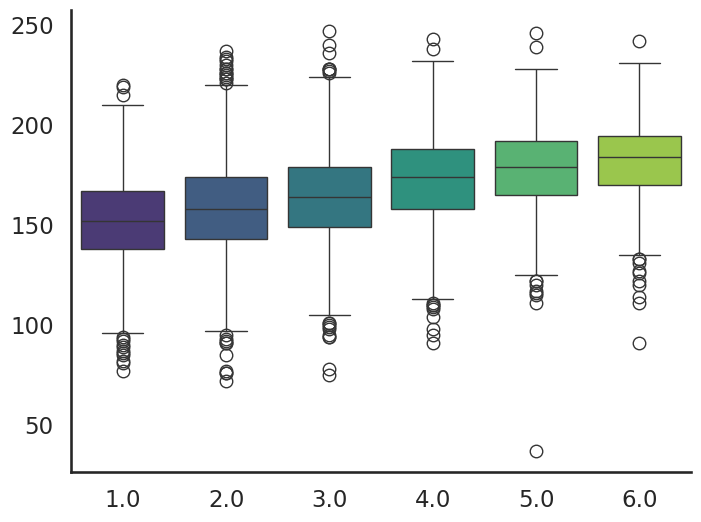

In [175]:
### --- Visualization 1: Stratum (Box Plot) ---
df_temp = df[df['STRATUM_ORDINAL'].notna()].copy()

plt.figure(figsize=(8, 6))

stratum_order = sorted(df_temp['STRATUM_ORDINAL'].unique())
sns.set_style('white')
sns.set_context('talk')
sns.boxplot(
    x='STRATUM_ORDINAL',
    y='G_SC',
    data=df_temp,
    order=stratum_order,
    palette='viridis')
# plt.title('G_SC Distribution by Socio-Economic Stratum')
# plt.xlabel('Socio-Economic Stratum (1: Lowest, 6: Highest)')
# plt.ylabel('Global Score (G_SC)')
plt.xlabel("")
plt.ylabel("")
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('Stratum_box.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-3650182644.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


<Figure size 640x480 with 0 Axes>

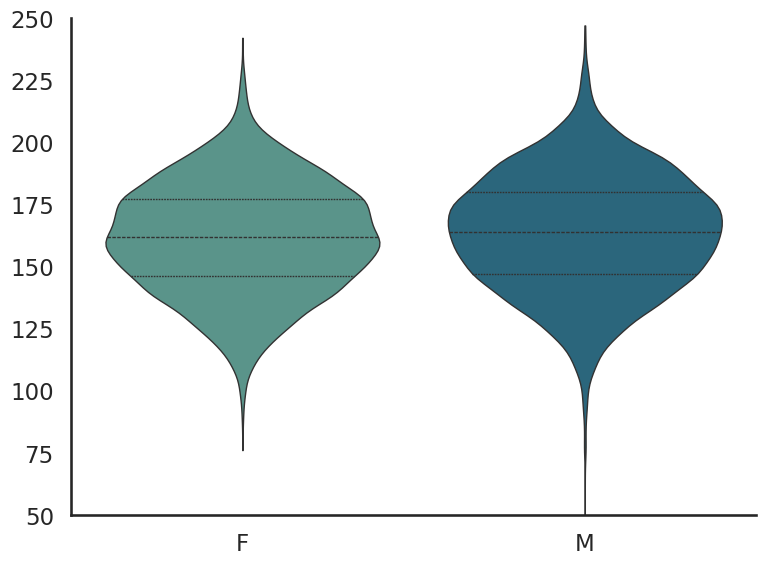

<Figure size 640x480 with 0 Axes>

In [176]:
### --- Visualization 2: G_SC Distribution by Gender (Violin Plot) ---
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_context('talk')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df,
    x='GENDER',
    y='G_SC',
    inner='quartile',
    palette='crest',
    cut=0,
    linewidth=1
)

# plt.title('G_SC Distribution by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Global Score (G_SC)')
plt.xlabel(""),
plt.ylabel("")
plt.ylim(50, 250)
plt.tight_layout()
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
plt.savefig('Gender_Violin.png', dpi=300, bbox_inches='tight')

/tmp/ipython-input-3204728427.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(


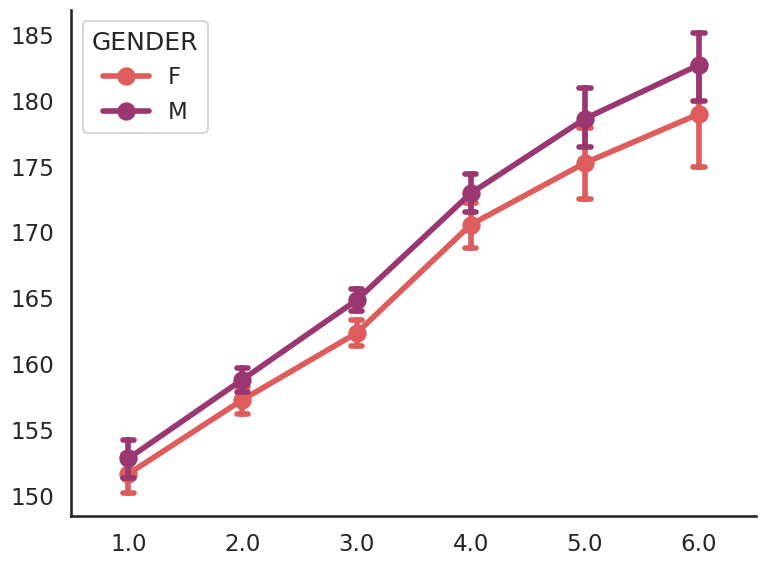

<Figure size 640x480 with 0 Axes>

In [177]:
### --- Visualization 3:  Gender & Stratum (Violin Plot) ---
plt.figure(figsize=(8,6))
sns.pointplot(
    data=df,
    x='STRATUM_ORDINAL',
    y='G_SC',
    hue='GENDER',
    ci=95,
    capsize=.1,
    palette='flare'
)
# plt.title('Mean G_SC by Socioeconomic Stratum')
# plt.xlabel('Stratum (1 = Lowest, 6 = Highest)')
# plt.ylabel('Mean Global Score (±95% CI)')
plt.xlabel(""),
plt.ylabel("")
plt.tight_layout()
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
plt.savefig('Figure4_Stratum_and_Gender.png', dpi=300, bbox_inches='tight')

/tmp/ipython-input-311748718.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


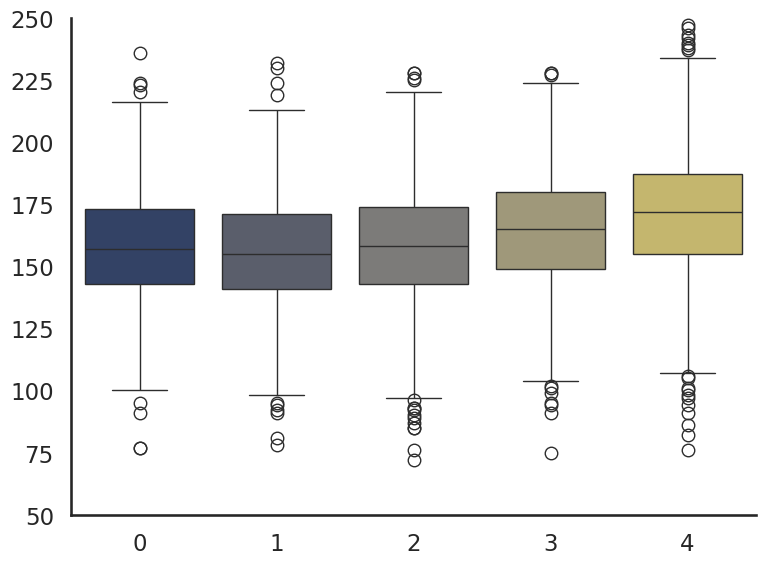

/tmp/ipython-input-311748718.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


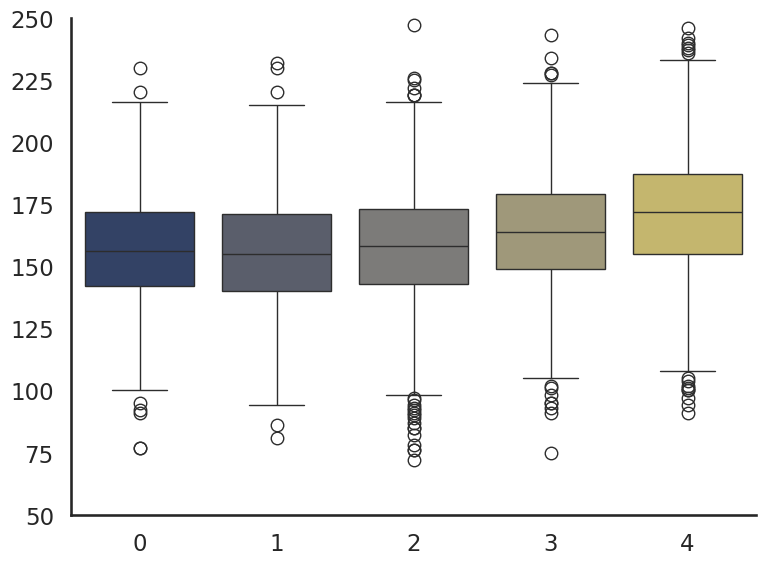

In [178]:
### --- Visualization 4: Parent education (Box Plot) ---

edu_level_labels = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4'
}

## EDU_FATHER_ORDINAL
df_father = df[df['EDU_FATHER_ORDINAL'].notna()].copy()
df_father['FATHER_EDU_LABEL'] = df_father['EDU_FATHER_ORDINAL'].astype(int).map(edu_level_labels)

father_order = [edu_level_labels[k] for k in sorted(df_father['EDU_FATHER_ORDINAL'].dropna().astype(int).unique())]

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='FATHER_EDU_LABEL',
    y='G_SC',
    data=df_father,
    order=father_order,
    palette='cividis'
)
# plt.title('G_SC Distribution by Father Education Level')
# plt.xlabel('Father Education Level (Low → High)')
# plt.ylabel('Global Score (G_SC)')
plt.xlabel("")
plt.ylabel("")
plt.ylim(50, 250)
plt.xticks(rotation=0)
plt.tight_layout()
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('EDU_father.png', dpi=300, bbox_inches='tight')
plt.show()

## EDU_MOTHER_ORDINAL
df_mother = df[df['EDU_MOTHER_ORDINAL'].notna()].copy()
df_mother['MOTHER_EDU_LABEL'] = df_mother['EDU_MOTHER_ORDINAL'].astype(int).map(edu_level_labels)

mother_order = [edu_level_labels[k] for k in sorted(df_mother['EDU_MOTHER_ORDINAL'].dropna().astype(int).unique())]

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='MOTHER_EDU_LABEL',
    y='G_SC',
    data=df_mother,
    order=mother_order,
    palette='cividis'
)
# plt.title('G_SC Distribution by Mother Education Level')
# plt.xlabel('Mother Education Level (Low → High)')
# plt.ylabel('Global Score (G_SC)')
plt.xlabel("")
plt.ylabel("")
plt.ylim(50, 250)
plt.xticks(rotation=0)
plt.tight_layout()
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig('EDU_mother.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipython-input-2695162351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


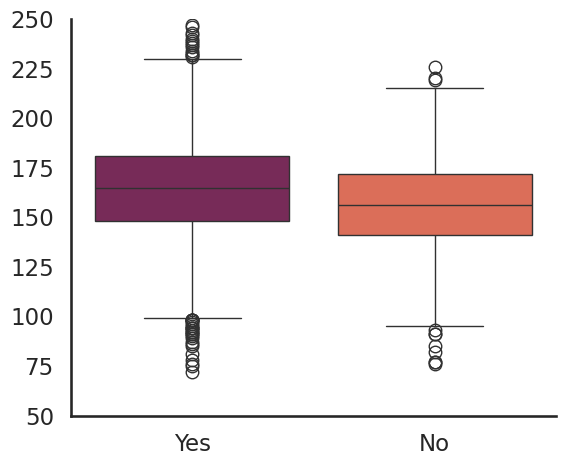

<Figure size 640x480 with 0 Axes>

In [179]:
### --- Visualization 5: G_SC by Computer Ownership (Box Plot) ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.boxplot(
    x='COMPUTER',
    y='G_SC',
    data=df, palette='rocket'
)
# plt.title('G_SC Distribution by Computer Ownership')
# plt.xlabel('Computer Ownership (Yes / No)')
# plt.ylabel('Global Score (G_SC)')
plt.xlabel("")
plt.ylabel("")
plt.ylim(50, 250)
plt.tight_layout()
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()
plt.savefig('computer_box.png', dpi=300, bbox_inches='tight')

In [180]:
#### ---- OLS & Mediation: STRATUM → S11_COMPOSITE → G_SC ----
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.stats import norm

print("\n=== Mediation Analysis: Does Socioeconomic Stratum affect University Performance (G_SC) via High School Composite (S11_COMPOSITE)? ===")

df_temp = df[['G_SC', 'S11_COMPOSITE', 'STRATUM_ORDINAL']].dropna().copy()

if df_temp['STRATUM_ORDINAL'].dtype != 'Int64' and df_temp['STRATUM_ORDINAL'].dtype != 'int64':
    df_temp['STRATUM_ORDINAL'] = df_temp['STRATUM_ORDINAL'].astype('Int64')

print(f"[info] N used: {len(df_temp)} observations")

# c (total effect)
m1 = smf.ols('G_SC ~ STRATUM_ORDINAL', data=df_temp).fit()
c, se_c, p_c = m1.params['STRATUM_ORDINAL'], m1.bse['STRATUM_ORDINAL'], m1.pvalues['STRATUM_ORDINAL']

# a
m2 = smf.ols('S11_COMPOSITE ~ STRATUM_ORDINAL', data=df_temp).fit()
a, se_a, p_a = m2.params['STRATUM_ORDINAL'], m2.bse['STRATUM_ORDINAL'], m2.pvalues['STRATUM_ORDINAL']

# c′
m3 = smf.ols('G_SC ~ STRATUM_ORDINAL + S11_COMPOSITE', data=df_temp).fit()
b, se_b, p_b  = m3.params['S11_COMPOSITE'], m3.bse['S11_COMPOSITE'], m3.pvalues['S11_COMPOSITE']
c_prime, se_cprime, p_cprime = m3.params['STRATUM_ORDINAL'], m3.bse['STRATUM_ORDINAL'], m3.pvalues['STRATUM_ORDINAL']

# indirect effect & sobel test
ab = a * b
sobel_se = np.sqrt(b**2 * se_a**2 + a**2 * se_b**2)
sobel_z = ab / sobel_se if sobel_se > 0 else np.nan
sobel_p = 2 * (1 - norm.cdf(abs(sobel_z))) if np.isfinite(sobel_z) else np.nan

# output
summary_tbl = pd.DataFrame({
    'path': ['c (total effect)', 'a (STRATUM→S11)', 'b (S11→G_SC)', "c′ (direct effect)", 'a×b (indirect)', 'Sobel z', 'Sobel p'],
    'estimate': [c, a, b, c_prime, ab, sobel_z, sobel_p],
    'std_error': [se_c, se_a, se_b, se_cprime, sobel_se, np.nan, np.nan],
    'p_value': [p_c, p_a, p_b, p_cprime, np.nan, np.nan, sobel_p]
})
print("\n--- Mediation results (STRATUM → S11_COMPOSITE → G_SC) ---")
print(summary_tbl.round(4).to_markdown(index=False))


=== Mediation Analysis: Does Socioeconomic Stratum affect University Performance (G_SC) via High School Composite (S11_COMPOSITE)? ===
[info] N used: 12397 observations

--- Mediation results (STRATUM → S11_COMPOSITE → G_SC) ---
| path               |   estimate |   std_error |   p_value |
|:-------------------|-----------:|------------:|----------:|
| c (total effect)   |     6.2008 |      0.1647 |    0      |
| a (STRATUM→S11)    |     3.3764 |      0.0693 |    0      |
| b (S11→G_SC)       |     1.7599 |      0.0144 |    0      |
| c′ (direct effect) |     0.2587 |      0.121  |    0.0324 |
| a×b (indirect)     |     5.942  |      0.1312 |  nan      |
| Sobel z            |    45.2969 |    nan      |  nan      |
| Sobel p            |     0      |    nan      |    0      |
